### Sirada Thoungvitayasutee 301292632

### Assignment 2

In [1]:
#import libraries
from sklearn.datasets import fetch_olivetti_faces
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

### 1. Retrieve and load the Olivetti faces dataset

In [2]:
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

#X = data.data so X is flatened

In [3]:
print(data.DESCR)
print(f'y: {y}')
#There are 400 images, each image has 4096 dimensional vector
#classes range from 0 to 39

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

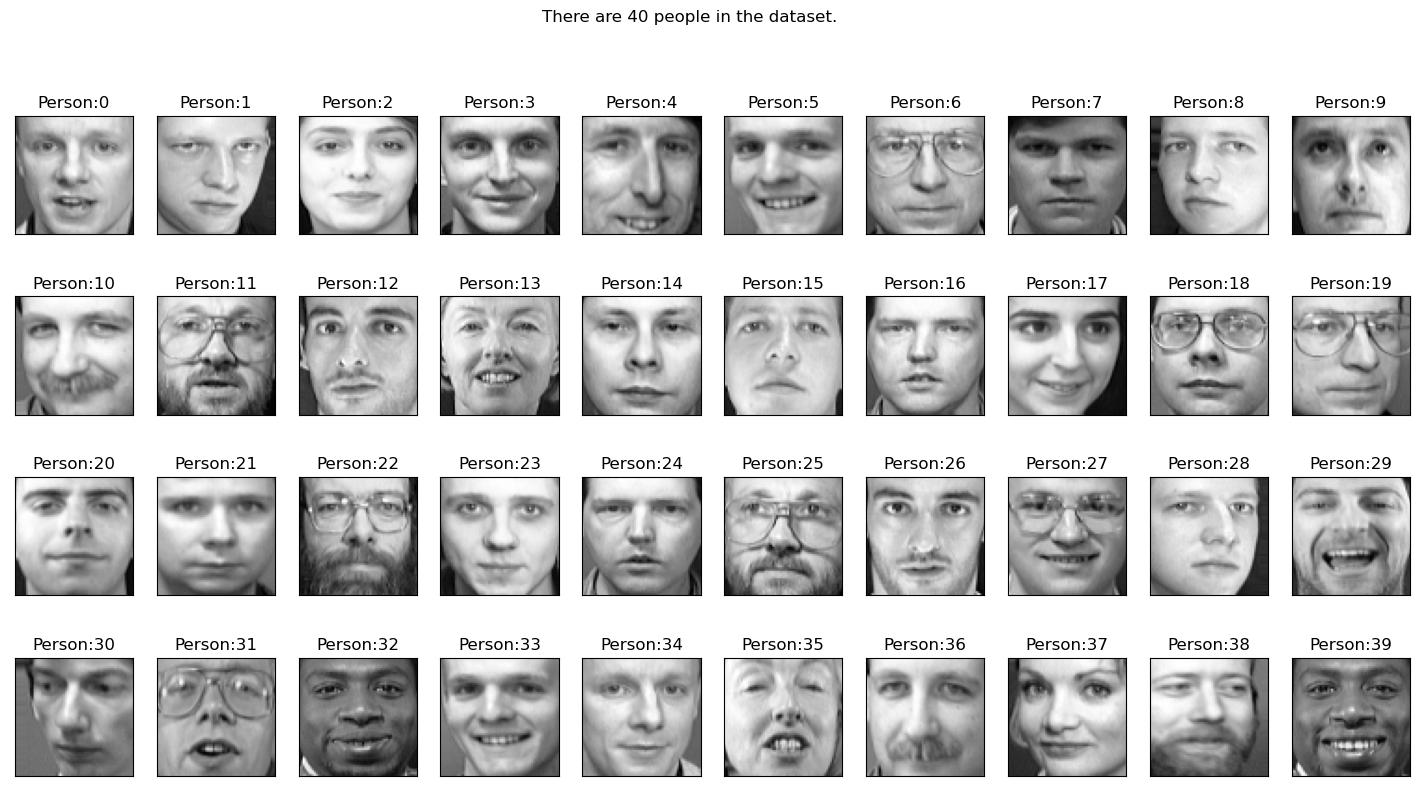

In [4]:
#print sample of the faces
def show_sample_faces(images, unique_ids):
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18,9))
    axarr = axarr.flatten()
    
    for unique_id in unique_ids:
        image_index = unique_id*10
        #reshape from flattened to 64x64
        image_reshaped = images[image_index].reshape(64,64) 
        axarr[unique_id].imshow(image_reshaped, cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title('Person:{}'.format(unique_id))
    plt.suptitle('There are 40 people in the dataset.')

show_sample_faces(X, np.unique(y))

In [5]:
print(X.shape)
print(y.shape)

#no need to flatten

(400, 4096)
(400,)


2. Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set. Provide your rationale for the split ratio.

In [6]:
#initiailize the split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#for a starting point, the data is split into 80% training, 10% testing and 10% for validation.
#split training dataset
train_index, temp_index = next(split.split(X,y))
X_train, X_temp = X[train_index], X[temp_index]
y_train, y_temp = y[train_index], y[temp_index]

#split testing and val
split_val_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
val_index, test_index = next(split_val_test.split(X_temp, y_temp))
X_val, X_test = X_temp[val_index], X_temp[test_index]
y_val, y_test = y_temp[val_index], y_temp[test_index]

#output
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Val set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

#As the dataset is 400 samples, it is better to have enough training dataset to train the model. Therefore, I used 80-10-10

Training set: (320, 4096), (320,)
Val set: (40, 4096), (40,)
Test set: (40, 4096), (40,)


<AxesSubplot:title={'center':'Training Set: Number of Samples Per Class'}, xlabel='subject ids'>

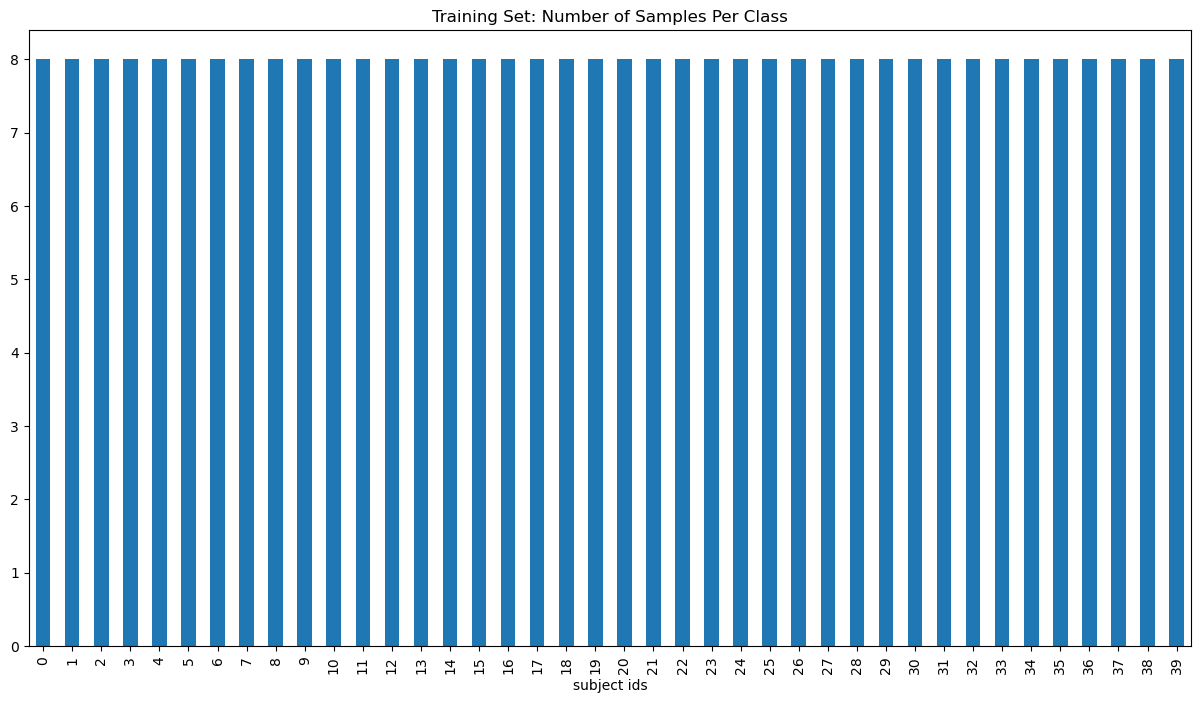

In [7]:
#print the graph to ensure that each person has same number of images
import pandas as pd
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8), title='Training Set: Number of Samples Per Class')

<AxesSubplot:title={'center':'Validation Set: Number of Samples Per Class'}, xlabel='subject ids'>

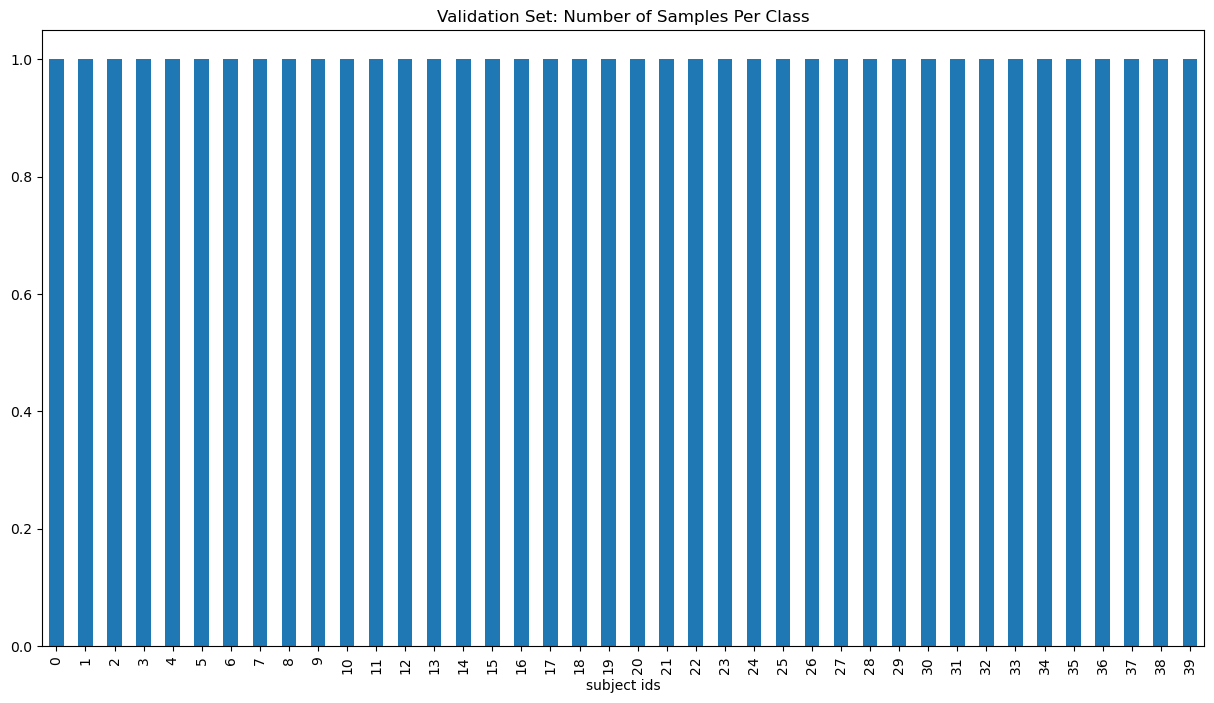

In [8]:
#print the graph to ensure that each person has same number of images
import pandas as pd
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_val
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8), title='Validation Set: Number of Samples Per Class')

<AxesSubplot:title={'center':'Testing Set: Number of Samples Per Class'}, xlabel='subject ids'>

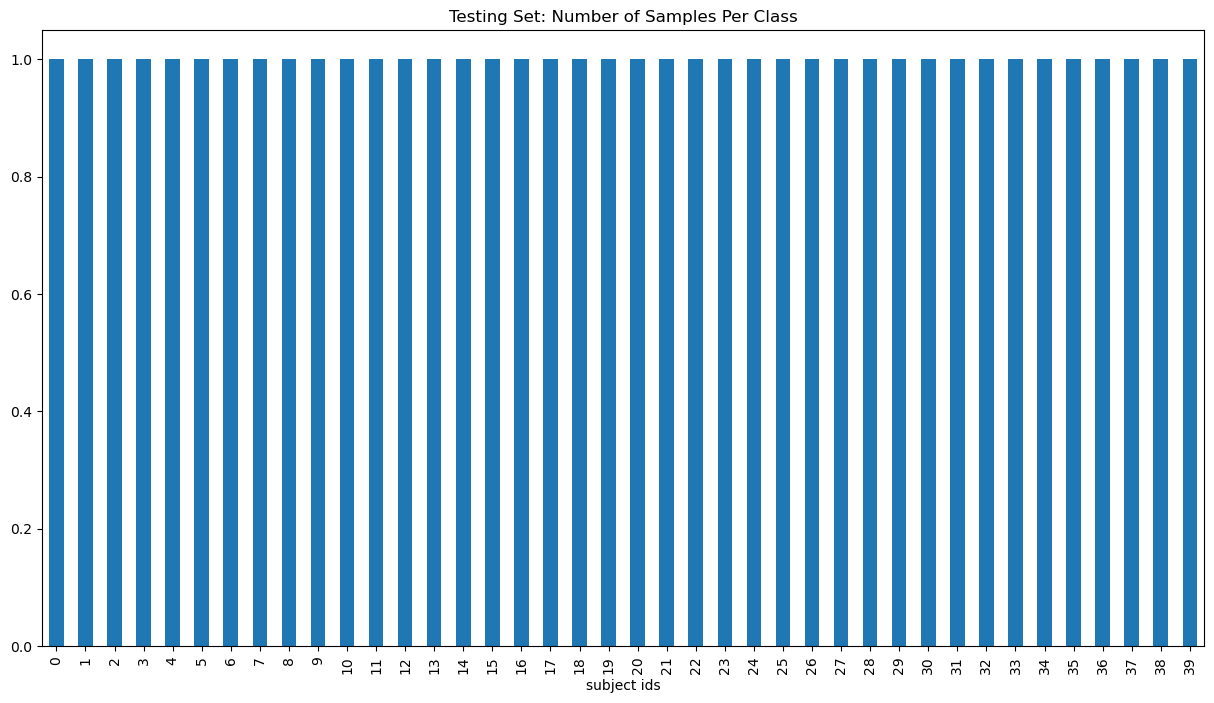

In [9]:
#print the graph to ensure that each person has same number of images
import pandas as pd
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_test
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8), title='Testing Set: Number of Samples Per Class')

### 3. Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [10]:
#define a classifier
clf = LogisticRegression(max_iter=1000, random_state=42)
#clf = SVC(max_iter=1000, random_state=42)

#perform a k-fold cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#train classifier on validation set
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=kf)

print(f'Cross-validation scores (5 folds): {cross_val_scores}')
print(f'Mean cross-validation scores: {cross_val_scores.mean()}')

#train the model
clf.fit(X_train, y_train)

#evaluate the model
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

Cross-validation scores (5 folds): [0.984375 0.90625  0.984375 0.953125 0.9375  ]
Mean cross-validation scores: 0.953125
Validation Accuracy: 0.95


### 4. Use K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters.

In [ ]:
#import k-means
#use kmeans clustering to group the images inro k clusters
#silhouette score provides a measure of how similar each point is to its own cluster compared to other cluster
#higher silhouette score shows better defined clusters


silhouette_scores = []
k_values = range(2,150)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    #fit k means to the dataset
    kmeans.fit(X)
    #get cluster labels
    cluster_labels = kmeans.labels_
    sil_score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(sil_score)
    
#find thebest K
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Best number of clusters (K): {best_k}')

#plot the score for each k mean
plt.figure(figsize=(10,6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='orange')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Per K Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#apply k-means with the best K
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
#use k means to reduce the dimensionality of the set
X_kmeans = kmeans_best.fit_transform(X)
print(f'Original shape: {X.shape}')
print(f'Reduced shape: {X_kmeans.shape}')

  File "C:\Users\venus\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [ ]:
y_kmeans = kmeans_best.labels_
y_kmeans
#from 0 - 39 changed to 0 - 123

In [ ]:
y_frame = pd.DataFrame()
y_frame['subject id'] = y_kmeans
y_frame.groupby(['subject id']).size().plot.bar(figsize=(15,8), title='Reduced dataset: Number of Samples Per Class')

### 5. Use the set from step (4) to train a classifier as in step (3)

In [ ]:
#from step 4, new X is X_kmeans
X = X_kmeans
y = y_kmeans

#train, test, split
#Each class doesn't have same number of image. So no need to use stratified
#for a starting point, the data is split into 80% training, 10% testing and 10% for validation.
#split training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print(f'X_train_kmeans: {X_train.shape}')
print(f'y_train_kmeans: {y_train.shape}')
print(f'X_val_kmeans: {X_val.shape}')
print(f'y_val_kmeans: {y_val.shape}')
print(f'X_test_kmeans: {X_test.shape}')
print(f'y_test_kmeans: {y_test.shape}')

In [ ]:
#User logistic regression

clf = LogisticRegression(max_iter=1000, random_state=42)
#clf = SVC(max_iter=1000)

#perform a k-fold cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#train classifier on validation set
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')

print(f'Cross-validation scores (5 folds): {cross_val_scores}')
print(f'Mean cross-validation scores: {cross_val_scores.mean()}')

#train the model
clf.fit(X_train, y_train)

#evaluate the model
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')

### 6. Apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to the Olivetti Faces dataset for clustering. Preprocess the images and convert them into feature vectors, then use DBSCAN to group similar images together based on their density. Provide your rationale for the similarity measure used to perform the clustering, considering the nature of facial image data.

In [ ]:
#download the dataset and reduced the dimension using optimal k
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target


optimal_k = best_k
kmeans_best = KMeans(n_clusters=optimal_k, random_state=42)
X_reduced = kmeans_best.fit_transform(X)
print(f'Original dataset: {X.shape}')
print(f'Reduced dataset: {X_reduced.shape}')

In [ ]:
#use DBSCAN
eps = 8
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan.fit(X_reduced)


labels =dbscan.labels_
#subtract noise from number of clusters
unique_labels, counts = np.unique(labels, return_counts=True)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise (-1)
n_noise = np.sum(labels == -1)


print(f'eps: {eps}')
print(f'min_samples: {min_samples}')
print(f'Number of Clusters: {n_clusters}')
print(f'Number of Noises: {n_noise}')
print(f'Number of sample in Each Cluster: {dict(zip(unique_labels, counts))}')

if n_clusters > 1:
    silhouette_avg = silhouette_score(X_reduced, labels)
    print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
#using PCA to reduce to 2D

#reload data
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(f'Original dataset: {X.shape}')
print(f'Reduced dataset: {X_reduced.shape}')

In [ ]:
#use dbscan
eps = 2
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan.fit(X_reduced)

#Ref: https://e.centennialcollege.ca/d2l/le/content/1186994/viewContent/15077600/View

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='+', s=size, cmap="Paired")
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker="*")

    if show_xlabels:
        plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    plt.title(f"PCA, eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)
    
plt.figure(figsize=(6, 4))
plot_dbscan(dbscan, X_reduced, size=100)
plt.show()



In [ ]:
labels = dbscan.labels_
unique_labels, counts = np.unique(labels, return_counts=True)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise (-1)
n_noise = np.sum(labels == -1)

print(f'eps: {eps}')
print(f'min_samples: {min_samples}')
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')
print(f'Number of sample in Each Cluster: {dict(zip(unique_labels, counts))}')

if n_clusters > 1:
    silhouette_avg = silhouette_score(X_reduced, labels)
    print(f"Silhouette Score: {silhouette_avg}")

Reference

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset

https://github.com/oanhdoan0601/ML-Sklearn-Face-Recognition-on-Olivetti-Dataset

https://e.centennialcollege.ca/d2l/le/content/1186994/viewContent/15077600/View